# Simple Linear Regression - Predicting Student Score

To predict the score of a student given hour number of studying

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1. Data Analysis

In [2]:
# load data from csv file
df = pd.read_csv("../data/student_score.csv")

df.head()

,Hour,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# display statistics infomation of dataset
df.describe()

,Hour,Score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# check the correlation coefficent between input and output variables
pearson_corr = df.corr(method='pearson')

pearson_corr

,Hour,Score
Hour,1.000000,0.976191
Score,0.976191,1.000000


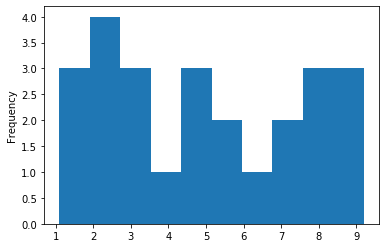

In [6]:
# plot Hours
df['Hour'].plot.hist()

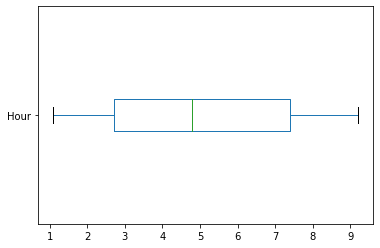

In [7]:
df['Hour'].plot.box(vert=False)

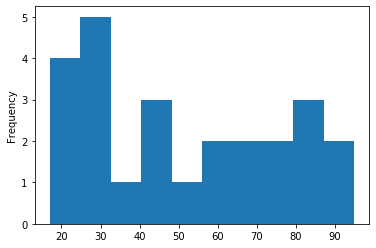

In [8]:
# plot Score
df['Score'].plot.hist()

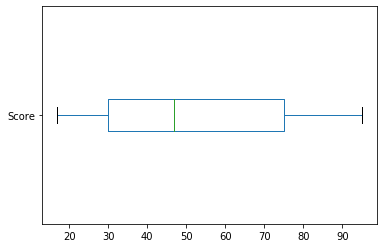

In [9]:
df['Score'].plot.box(vert=False)

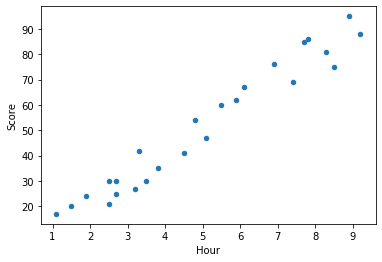

In [10]:
# plot the data
df.plot.scatter(x='Hour', y='Score')

### 2. Training

In [11]:
# prepare input and output data
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

# split data into train and test set with 10% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# train model
model = LinearRegression()
model.fit(X_train, y_train)

# learned parameters
w0 = model.coef_[0]
w1 = model.intercept_

# display information of model
print('We obtained the model parameters as follow:')
print("w0: ", w0)
print("w1: ", w1)
print('Regression line: Salary = %f*YearsExperience + %f' % (w0, w1))

We obtained the model parameters as follow:
w0:  9.854755410326351
w1:  2.5200767068662273
Regression line: Salary = 9.854755*YearsExperience + 2.520077


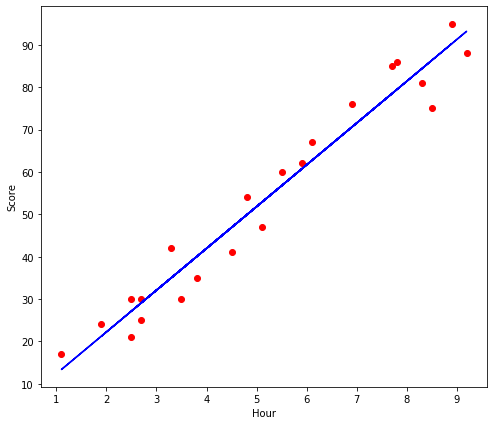

In [12]:
# plot regression line
plt.figure(figsize=(8, 7))
plt.scatter(X_train, y_train, color='red')

# plot regression line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

### 3. Evaluation

In [13]:
# make prediction with test set
y_predicted = model.predict(X_test)

# calculat evaluation measures: mean square error, mean absolute r2-score
mse = metrics.mean_squared_error(y_test, y_predicted)
mae = metrics.mean_absolute_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  32.86556964734211
Mean absolute error:  5.399450313612007
R2 score:  0.9298077534821834


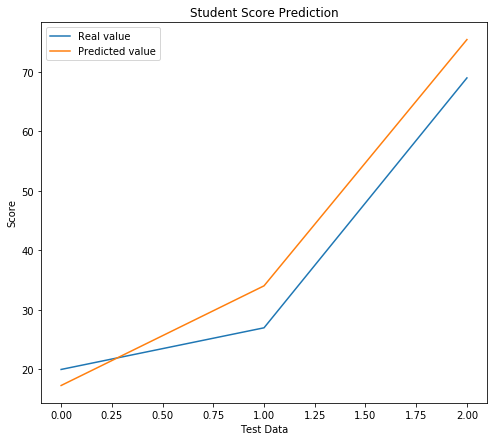

In [14]:
# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test.values, label='Real value')
plt.plot(y_predicted, label='Predicted value')

plt.title('Student Score Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()

### 4. Prediction

In [15]:
# predict
hour = [6]
salary = model.predict([hour])
print('Hour: ', hour)
print('Score: ', salary)

Hour:  [6]
Score:  [61.64860917]
